In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
dataset1_train = pd.read_csv('/content/drive/MyDrive/PRML/assignment4/Dataset-1/train.csv')
dataset1_test = pd.read_csv('/content/drive/MyDrive/PRML/assignment4/Dataset-1/test.csv')
dataset1_val= pd.read_csv('/content/drive/MyDrive/PRML/assignment4/Dataset-1/val.csv')

dataset2_train = pd.read_csv('/content/drive/MyDrive/PRML/assignment4/Dataset-2/Train.csv')
dataset2_test = pd.read_csv('/content/drive/MyDrive/PRML/assignment4/Dataset-2/Test.csv')
dataset2_val = pd.read_csv('/content/drive/MyDrive/PRML/assignment4/Dataset-2/Val.csv')

dataset3_train_data=  pd.read_csv('/content/drive/MyDrive/PRML/assignment4/Dataset-3/train_data.csv')
dataset3_train_label=  pd.read_csv('/content/drive/MyDrive/PRML/assignment4/Dataset-3/train_label.csv')
dataset3_test_data=  pd.read_csv('/content/drive/MyDrive/PRML/assignment4/Dataset-3/test_data.csv')
dataset3_test_label=  pd.read_csv('/content/drive/MyDrive/PRML/assignment4/Dataset-3/test_label.csv')
dataset3_val_data= pd.read_csv('/content/drive/MyDrive/PRML/assignment4/Dataset-3/val_data.csv')
dataset3_val_label= pd.read_csv('/content/drive/MyDrive/PRML/assignment4/Dataset-3/val_label.csv')

Training Accuracy: 0.9702380952380952
Validation Accuracy: 0.9625
Test Accuracy: 0.975


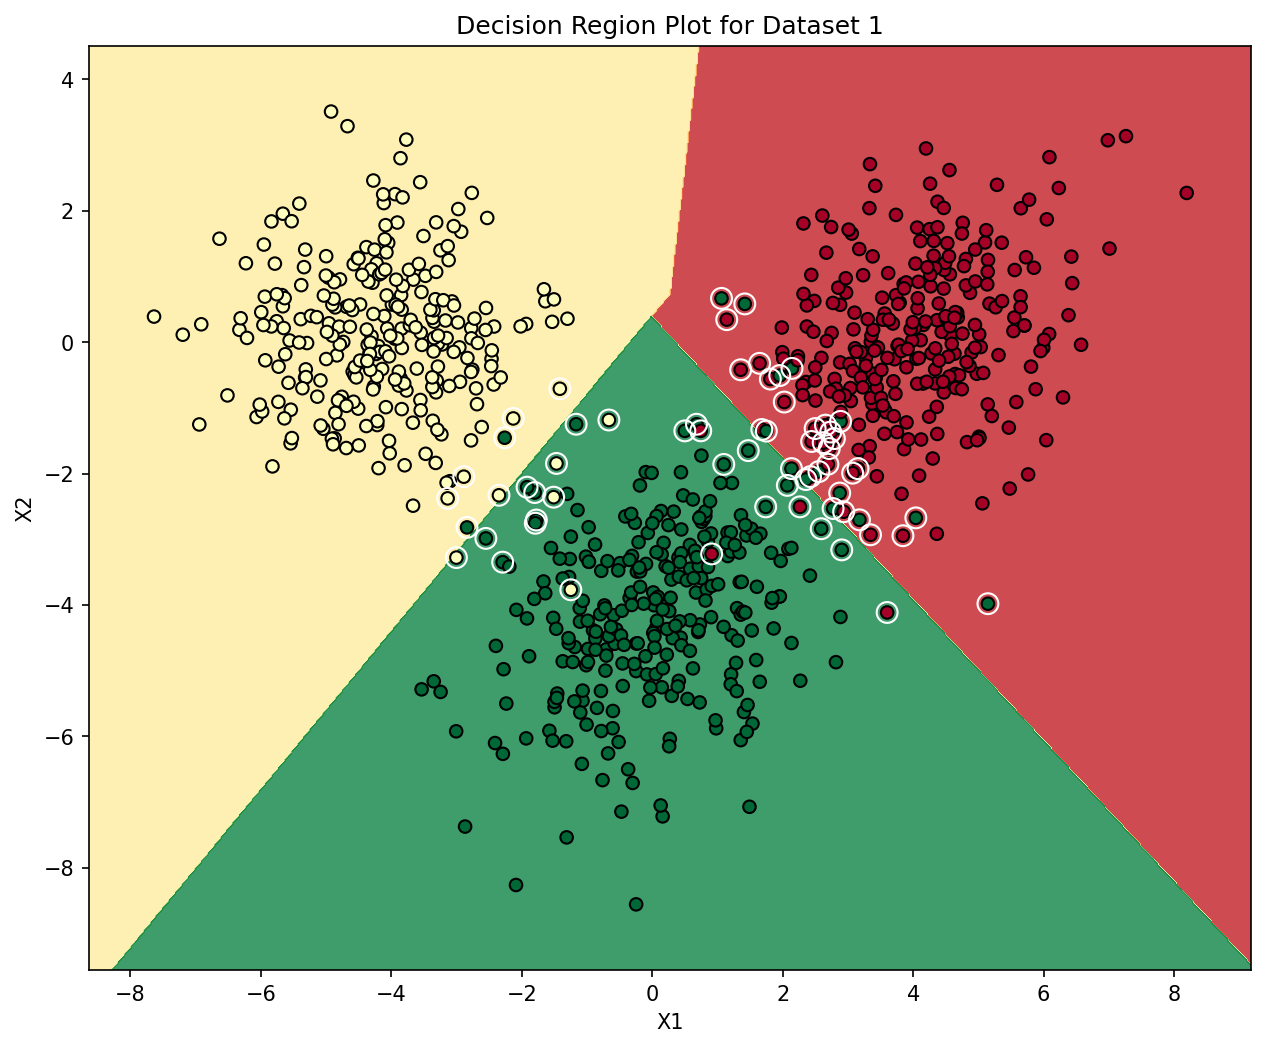

In [ ]:
# prompt: Classifier for Dataset 1 using linear kernel based SVMs. Print classification accuracies for the training data, validation data and the test data.
# Decision region plot for classifier. Superpose the training data on the decision
# region plot. Mark the support vectors. For decision region plot create 3 variable to edit the colours of the plot and make it higher resolution.

import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score

# Prepare the data
X_train = dataset1_train.iloc[:, :-1].values
y_train = dataset1_train.iloc[:, -1].values
X_val = dataset1_val.iloc[:, :-1].values
y_val = dataset1_val.iloc[:, -1].values
X_test = dataset1_test.iloc[:, :-1].values
y_test = dataset1_test.iloc[:, -1].values

# Create and train the SVM classifier
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred_train = classifier.predict(X_train)
y_pred_val = classifier.predict(X_val)
y_pred_test = classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
val_accuracy = accuracy_score(y_val, y_pred_val)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Decision region plot
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Customizable plot colors
light_color = 'lightgreen' #lightblue
dark_color = 'darkgreen'  #darkblue
support_vector_color = 'white'


plt.figure(figsize=(10, 8), dpi=150) #higher resolution
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.8) #colors from red to yellow to green

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlGn, edgecolors='k')
# plot support vectors
plt.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors=support_vector_color)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Region Plot for Dataset 1')
plt.show()

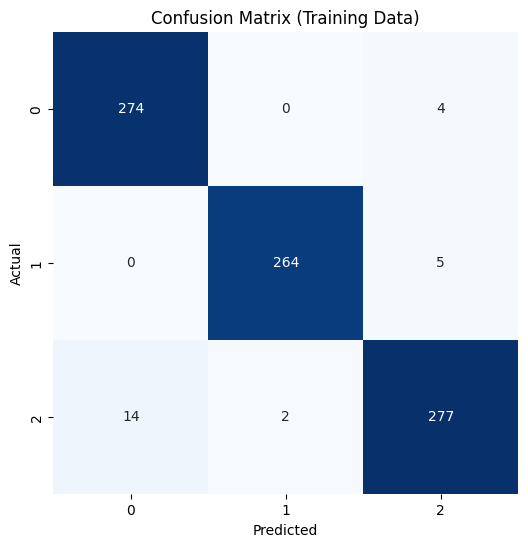

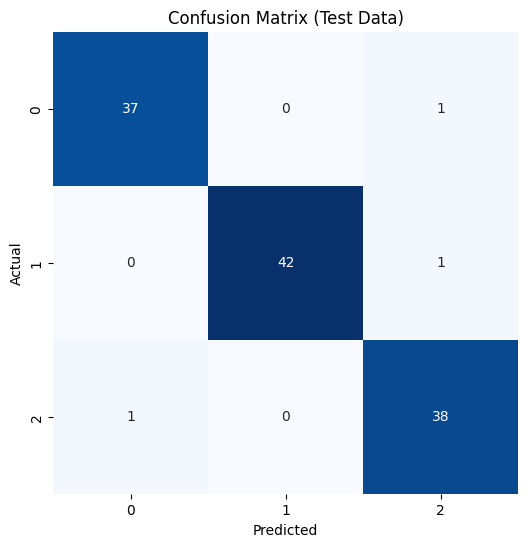

In [ ]:
# prompt: Confusion matrices for training data and test data of the above SVM

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix for training data
cm_train = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Training Data)")
plt.show()

# Confusion matrix for test data
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Data)")
plt.show()

In [ ]:
# prompt: Classifier for Dataset 2 using (a) polynomial kernel based SVM and (b) Gaussian kernel based SVM. (Use 4 different values of kernel hyperparameter : (a) Degree for polynomial kernel and (b) Kernel width for Gaussian kernel). (Use values of C as 1, 10, 100).
# Print classification accuracies for the training data, validation data and the test data.
# Choose the best performing model for each polynomial and guassian.

# Prepare the data for Dataset 2
X_train_2 = dataset2_train.iloc[:, :-1].values
y_train_2 = dataset2_train.iloc[:, -1].values
X_val_2 = dataset2_val.iloc[:, :-1].values
y_val_2 = dataset2_val.iloc[:, -1].values
X_test_2 = dataset2_test.iloc[:, :-1].values
y_test_2 = dataset2_test.iloc[:, -1].values

def evaluate_svm(kernel, degree_or_gamma_values, C_values):
  best_accuracy = 0
  best_model = None
  for degree_or_gamma in degree_or_gamma_values:
    for C in C_values:
      if kernel == 'poly':
          model = svm.SVC(kernel=kernel, degree=degree_or_gamma, C=C)
      else: #kernel == 'rbf'
          model = svm.SVC(kernel=kernel, gamma=degree_or_gamma, C=C)
      model.fit(X_train_2, y_train_2)
      y_pred_train = model.predict(X_train_2)
      y_pred_val = model.predict(X_val_2)
      y_pred_test = model.predict(X_test_2)

      train_accuracy = accuracy_score(y_train_2, y_pred_train)
      val_accuracy = accuracy_score(y_val_2, y_pred_val)
      test_accuracy = accuracy_score(y_test_2, y_pred_test)
      print(f"Kernel: {kernel}, Degree/Gamma: {degree_or_gamma}, C: {C}")
      print(f"  Training Accuracy: {train_accuracy}")
      print(f"  Validation Accuracy: {val_accuracy}")
      print(f"  Test Accuracy: {test_accuracy}")

      if val_accuracy > best_accuracy:
          best_accuracy = val_accuracy
          best_model = model
  return best_model, best_accuracy

# Polynomial Kernel SVM
degree_values = [2, 3, 4, 5]
C_values = [1, 10, 100]
best_poly_model, best_poly_accuracy = evaluate_svm('poly', degree_values, C_values)
print(f"\nBest Polynomial Kernel Model Accuracy: {best_poly_accuracy}")

# Gaussian Kernel SVM
gamma_values = [0.1, 1, 10, 100] # Example gamma values
C_values = [1, 10, 100]
best_gaussian_model, best_gaussian_accuracy = evaluate_svm('rbf', gamma_values, C_values)
print(f"\nBest Gaussian Kernel Model Accuracy: {best_gaussian_accuracy}")

Kernel: poly, Degree/Gamma: 2, C: 1
  Training Accuracy: 0.9910873440285205
  Validation Accuracy: 1.0
  Test Accuracy: 1.0
Kernel: poly, Degree/Gamma: 2, C: 10
  Training Accuracy: 0.9910873440285205
  Validation Accuracy: 1.0
  Test Accuracy: 1.0
Kernel: poly, Degree/Gamma: 2, C: 100
  Training Accuracy: 0.9910873440285205
  Validation Accuracy: 1.0
  Test Accuracy: 1.0
Kernel: poly, Degree/Gamma: 3, C: 1
  Training Accuracy: 0.6417112299465241
  Validation Accuracy: 0.5345911949685535
  Test Accuracy: 0.6125
Kernel: poly, Degree/Gamma: 3, C: 10
  Training Accuracy: 0.6399286987522281
  Validation Accuracy: 0.5345911949685535
  Test Accuracy: 0.6125
Kernel: poly, Degree/Gamma: 3, C: 100
  Training Accuracy: 0.6007130124777184
  Validation Accuracy: 0.5031446540880503
  Test Accuracy: 0.5625
Kernel: poly, Degree/Gamma: 4, C: 1
  Training Accuracy: 0.9910873440285205
  Validation Accuracy: 1.0
  Test Accuracy: 1.0
Kernel: poly, Degree/Gamma: 4, C: 10
  Training Accuracy: 0.991087344028

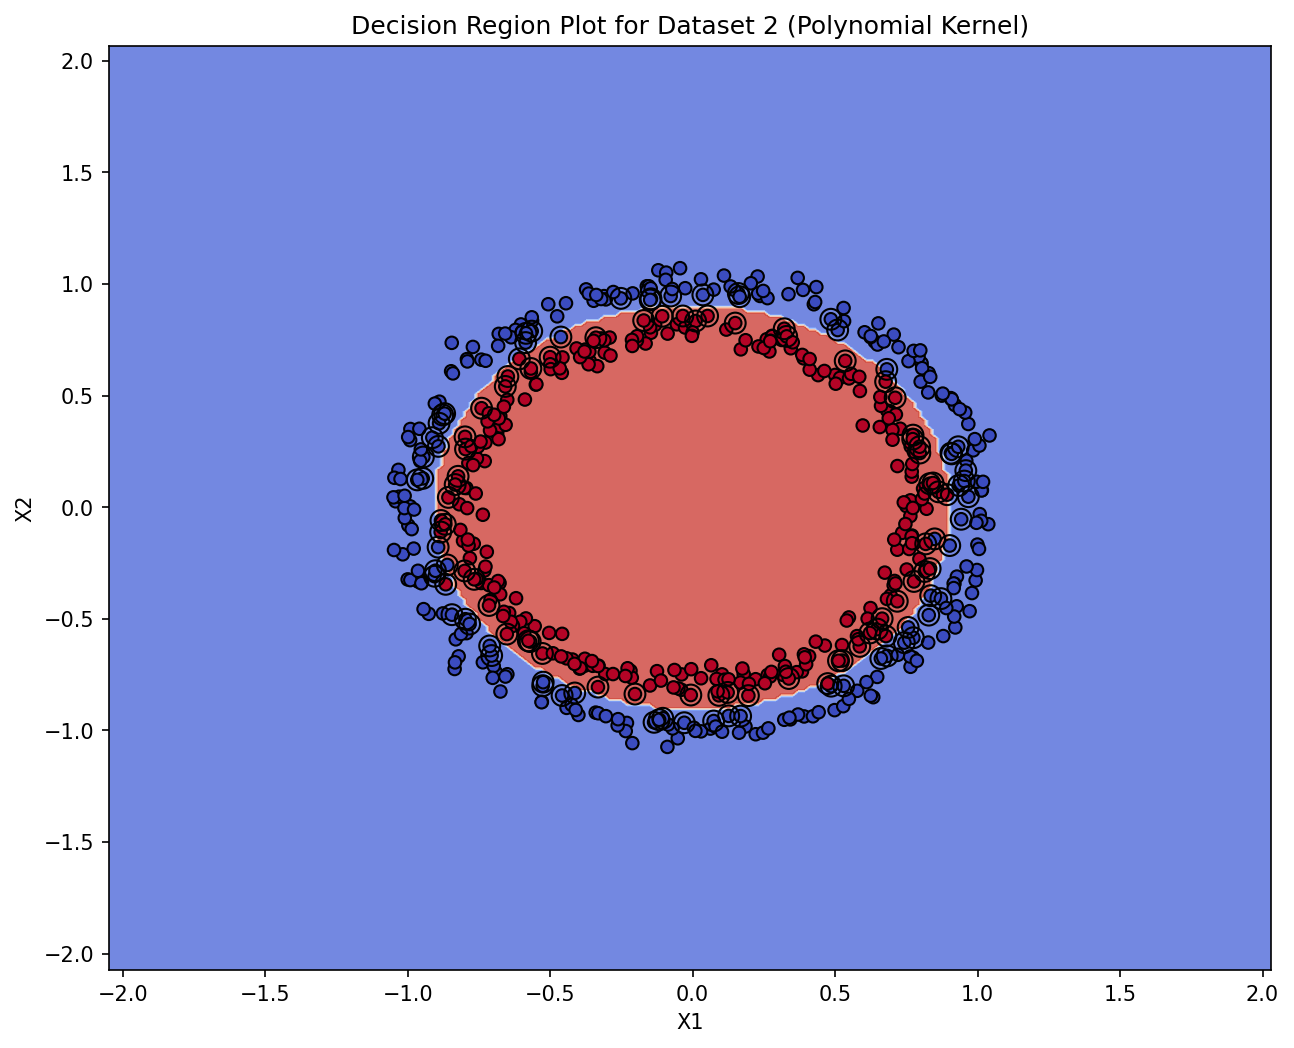

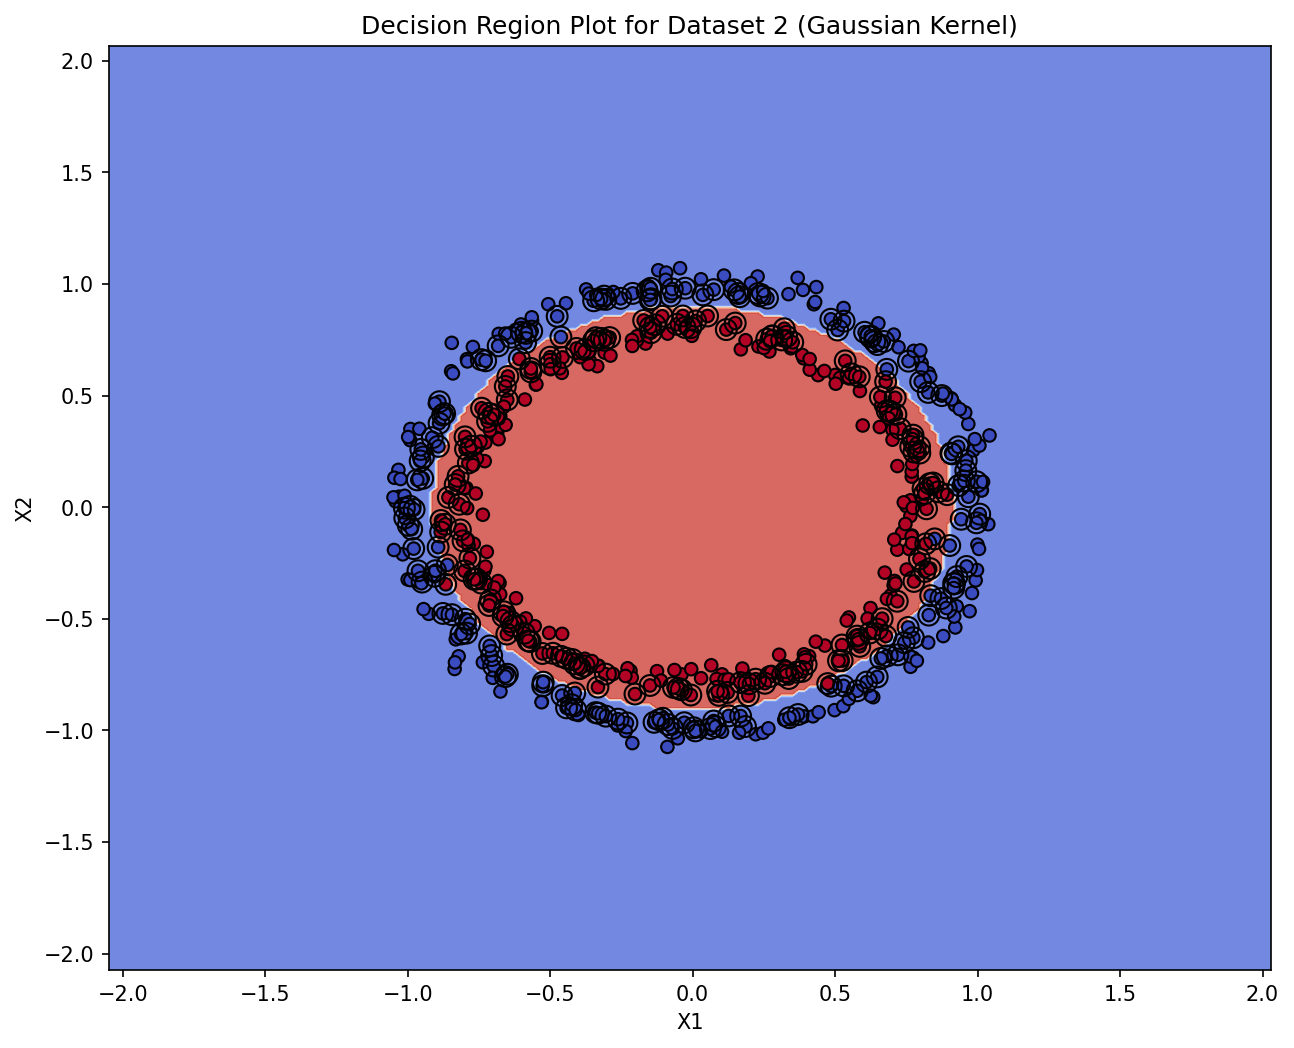

In [ ]:
# prompt: using the best degree and C for the above, plot the Decision region plot for classifiers. Superpose the training data on the decision region plot. Mark the support vectors. For decision region plot create 3 variable to edit the colours of the plot and make it higher resolution.

# Decision region plot for the best polynomial kernel model
# Assuming best_poly_model is already determined from the previous code

# Prepare the data
X_train_2 = dataset2_train.iloc[:, :-1].values
y_train_2 = dataset2_train.iloc[:, -1].values


# Create the meshgrid
h = .02  # step size in the mesh
x_min, x_max = X_train_2[:, 0].min() - 1, X_train_2[:, 0].max() + 1
y_min, y_max = X_train_2[:, 1].min() - 1, X_train_2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on the meshgrid
Z = best_poly_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Customizable plot colors and higher resolution
light_color = 'lightcoral'
dark_color = 'darkred'
support_vector_color = 'black'


plt.figure(figsize=(10, 8), dpi=150)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot training data and support vectors
plt.scatter(X_train_2[:, 0], X_train_2[:, 1], c=y_train_2, cmap=plt.cm.coolwarm, edgecolors='k')
plt.scatter(best_poly_model.support_vectors_[:, 0], best_poly_model.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors=support_vector_color)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Region Plot for Dataset 2 (Polynomial Kernel)')
plt.show()


# Decision region plot for the best Gaussian kernel model
# Assuming best_gaussian_model is already determined

# Predict on the meshgrid
Z = best_gaussian_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8), dpi=150)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot training data and support vectors
plt.scatter(X_train_2[:, 0], X_train_2[:, 1], c=y_train_2, cmap=plt.cm.coolwarm, edgecolors='k')
plt.scatter(best_gaussian_model.support_vectors_[:, 0], best_gaussian_model.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors=support_vector_color)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Region Plot for Dataset 2 (Gaussian Kernel)')
plt.show()

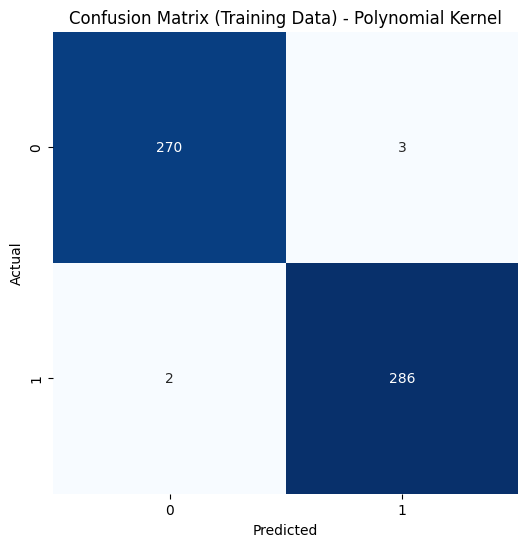

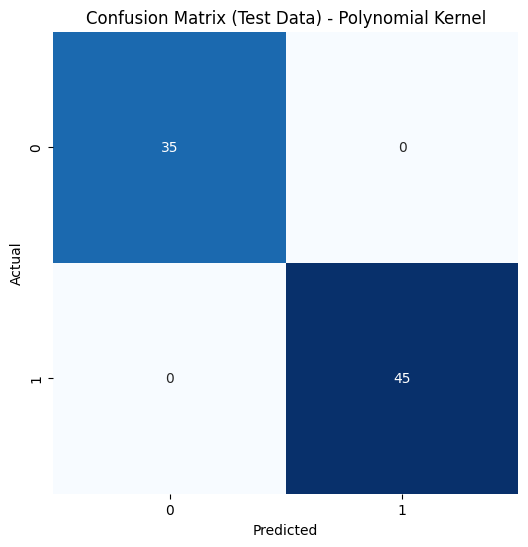

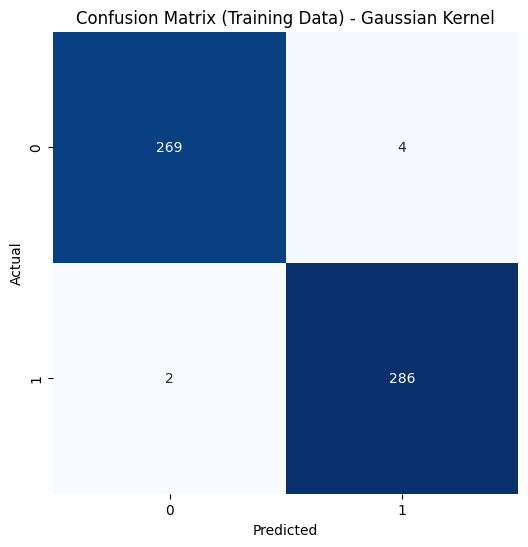

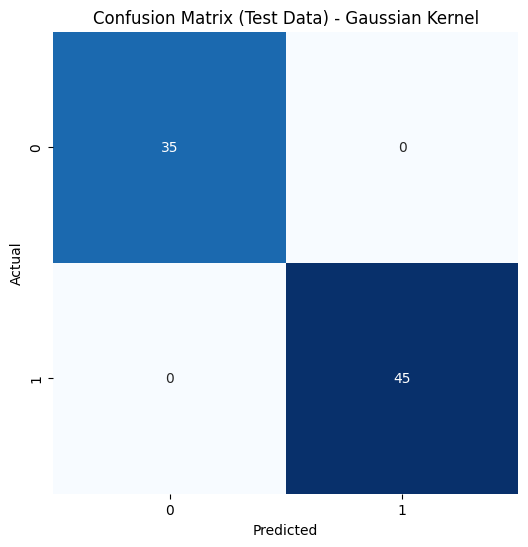

In [ ]:
# prompt: Confusion matrices for training data and test data for the best model in the previous

# Confusion matrix for the best polynomial kernel model (Dataset 2)
y_pred_train_poly = best_poly_model.predict(X_train_2)
y_pred_test_poly = best_poly_model.predict(X_test_2)

cm_train_poly = confusion_matrix(y_train_2, y_pred_train_poly)
cm_test_poly = confusion_matrix(y_test_2, y_pred_test_poly)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_train_poly, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Training Data) - Polynomial Kernel")
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(cm_test_poly, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Data) - Polynomial Kernel")
plt.show()


# Confusion matrix for the best Gaussian kernel model (Dataset 2)
y_pred_train_gaussian = best_gaussian_model.predict(X_train_2)
y_pred_test_gaussian = best_gaussian_model.predict(X_test_2)

cm_train_gaussian = confusion_matrix(y_train_2, y_pred_train_gaussian)
cm_test_gaussian = confusion_matrix(y_test_2, y_pred_test_gaussian)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_train_gaussian, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Training Data) - Gaussian Kernel")
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(cm_test_gaussian, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Data) - Gaussian Kernel")
plt.show()

In [ ]:
# prompt: Classifier for Dataset 3 using (a) polynomial kernel based SVM and (b) Gaussian kernel based SVM. (Use 4 different values of kernel hyperparameter : (a) Degree for polynomial kernel and (b) Kernel width for Gaussian kernel). (Use values of C as 1, 10, 100).
# Print classification accuracies for the training data, validation data and the test data.
# Choose the best performing model for each polynomial and guassian.
# Print classification accuracies for the training data, validation data and the test data.
# Choose the best performing model for each polynomial and guassian.

def evaluate_svm(kernel, degree_or_gamma_values, C_values, X_train, y_train, X_val, y_val, X_test, y_test):
    best_accuracy = 0
    best_model = None
    for degree_or_gamma in degree_or_gamma_values:
        for C in C_values:
            if kernel == 'poly':
                model = svm.SVC(kernel=kernel, degree=degree_or_gamma, C=C)
            else:  # kernel == 'rbf'
                model = svm.SVC(kernel=kernel, gamma=degree_or_gamma, C=C)
            model.fit(X_train, y_train)
            y_pred_train = model.predict(X_train)
            y_pred_val = model.predict(X_val)
            y_pred_test = model.predict(X_test)

            train_accuracy = accuracy_score(y_train, y_pred_train)
            val_accuracy = accuracy_score(y_val, y_pred_val)
            test_accuracy = accuracy_score(y_test, y_pred_test)
            print(f"Kernel: {kernel}, Degree/Gamma: {degree_or_gamma}, C: {C}")
            print(f"  Training Accuracy: {train_accuracy}")
            print(f"  Validation Accuracy: {val_accuracy}")
            print(f"  Test Accuracy: {test_accuracy}")

            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_model = model
    return best_model, best_accuracy


# Prepare the data for Dataset 3
X_train_3 = dataset3_train_data.values
y_train_3 = dataset3_train_label.values.ravel()  # Convert to 1D array
X_val_3 = dataset3_val_data.values
y_val_3 = dataset3_val_label.values.ravel()
X_test_3 = dataset3_test_data.values
y_test_3 = dataset3_test_label.values.ravel()


# Polynomial Kernel SVM for Dataset 3
degree_values = [2, 3, 4, 5]
C_values = [1, 10, 100]
best_poly_model_3, best_poly_accuracy_3 = evaluate_svm('poly', degree_values, C_values, X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)
print(f"\nBest Polynomial Kernel Model (Dataset 3) Accuracy: {best_poly_accuracy_3}")

# Gaussian Kernel SVM for Dataset 3
gamma_values = [0.1, 1, 10, 100]
C_values = [1, 10, 100]
best_gaussian_model_3, best_gaussian_accuracy_3 = evaluate_svm('rbf', gamma_values, C_values, X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)
print(f"\nBest Gaussian Kernel Model (Dataset 3) Accuracy: {best_gaussian_accuracy_3}")

Kernel: poly, Degree/Gamma: 2, C: 1
  Training Accuracy: 0.7293949499761792
  Validation Accuracy: 0.5886287625418061
  Test Accuracy: 0.5559265442404007
Kernel: poly, Degree/Gamma: 2, C: 10
  Training Accuracy: 0.9104335397808481
  Validation Accuracy: 0.5886287625418061
  Test Accuracy: 0.5158597662771286
Kernel: poly, Degree/Gamma: 2, C: 100
  Training Accuracy: 0.9990471653168176
  Validation Accuracy: 0.5217391304347826
  Test Accuracy: 0.48747913188647746
Kernel: poly, Degree/Gamma: 3, C: 1
  Training Accuracy: 0.9485469271081467
  Validation Accuracy: 0.5785953177257525
  Test Accuracy: 0.5208681135225376
Kernel: poly, Degree/Gamma: 3, C: 10
  Training Accuracy: 1.0
  Validation Accuracy: 0.5384615384615384
  Test Accuracy: 0.49248747913188645
Kernel: poly, Degree/Gamma: 3, C: 100
  Training Accuracy: 1.0
  Validation Accuracy: 0.5384615384615384
  Test Accuracy: 0.49248747913188645
Kernel: poly, Degree/Gamma: 4, C: 1
  Training Accuracy: 1.0
  Validation Accuracy: 0.53177257525

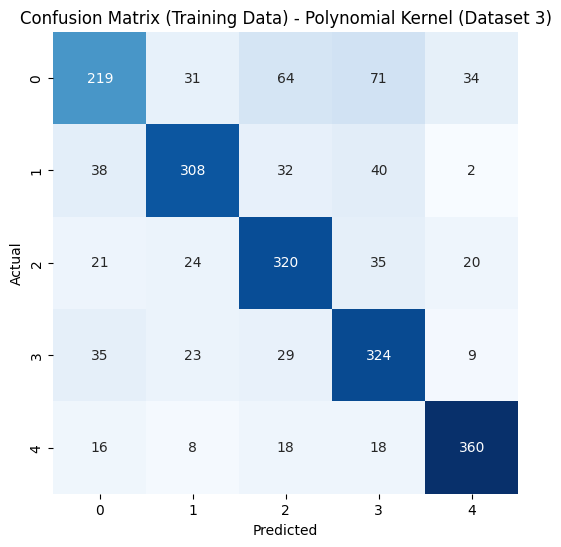

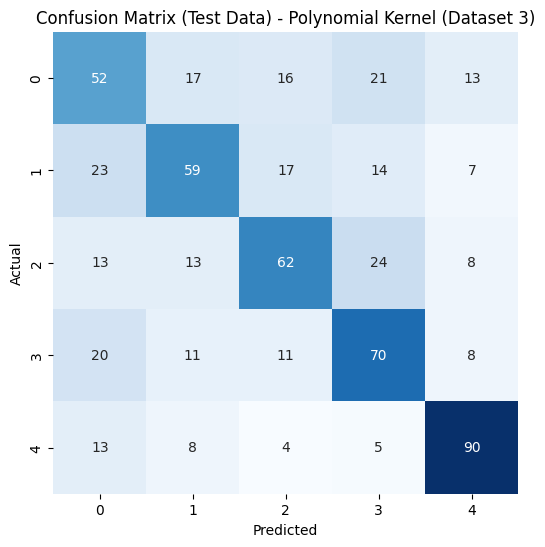

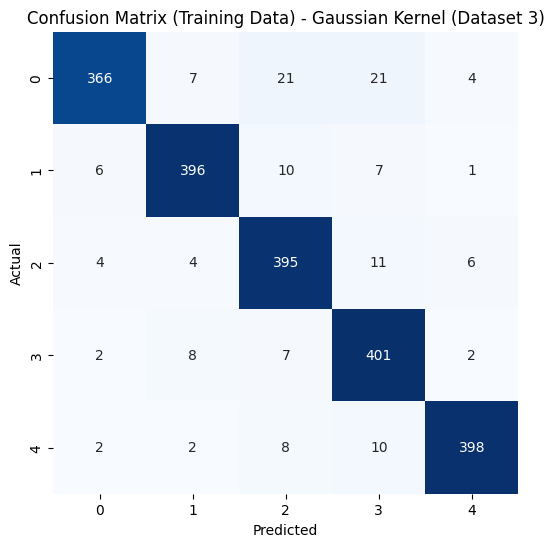

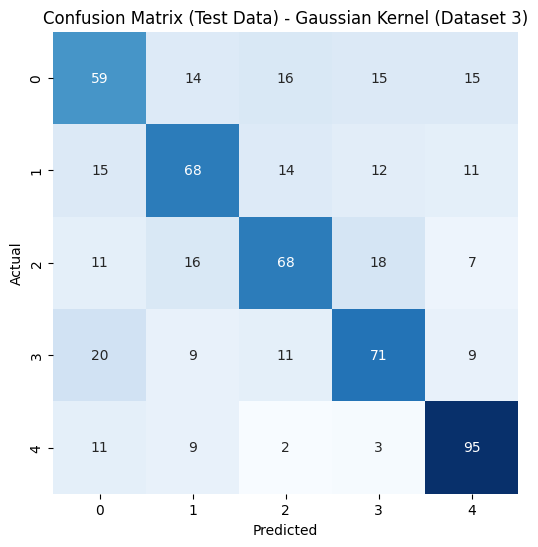

In [ ]:
# prompt: Confusion matrices for training data and test data for the best model found in the previous. Get the degree and C from previous and create the best model for both polynomial and gaussian kernel. This is for dataset 3

# Confusion matrix for the best polynomial kernel model (Dataset 3)
y_pred_train_poly_3 = best_poly_model_3.predict(X_train_3)
y_pred_test_poly_3 = best_poly_model_3.predict(X_test_3)

cm_train_poly_3 = confusion_matrix(y_train_3, y_pred_train_poly_3)
cm_test_poly_3 = confusion_matrix(y_test_3, y_pred_test_poly_3)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_train_poly_3, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Training Data) - Polynomial Kernel (Dataset 3)")
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(cm_test_poly_3, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Data) - Polynomial Kernel (Dataset 3)")
plt.show()

# Confusion matrix for the best Gaussian kernel model (Dataset 3)
y_pred_train_gaussian_3 = best_gaussian_model_3.predict(X_train_3)
y_pred_test_gaussian_3 = best_gaussian_model_3.predict(X_test_3)

cm_train_gaussian_3 = confusion_matrix(y_train_3, y_pred_train_gaussian_3)
cm_test_gaussian_3 = confusion_matrix(y_test_3, y_pred_test_gaussian_3)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_train_gaussian_3, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Training Data) - Gaussian Kernel (Dataset 3)")
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(cm_test_gaussian_3, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Data) - Gaussian Kernel (Dataset 3)")
plt.show()

In [ ]:
# prompt: Dataset 3: A table of percentage of bounded and unbounded support vectors out of the
# training examples, for the best performing model of (a) polynomial kernel based SVM, and (b) Gaussian kernel based SVM. Check my SVM implementation above and solve for unbounded support vectors too

# ... (Your existing code)

# Function to calculate bounded and unbounded support vectors
def support_vector_stats(model, X_train, y_train):
    support_vectors = model.support_vectors_
    n_support_vectors = len(support_vectors)
    dual_coef = np.abs(model.dual_coef_) # absolute values of dual coefficients

    bounded_count = 0
    for i in range(n_support_vectors):
        if dual_coef[0,i] < model.C: # check if dual coefficient < C for bounded support vectors
            bounded_count += 1

    unbounded_count = n_support_vectors - bounded_count

    return bounded_count / len(X_train) * 100 , unbounded_count / len(X_train) * 100

# Calculate for Polynomial Kernel
bounded_percent_poly, unbounded_percent_poly = support_vector_stats(best_poly_model_3, X_train_3, y_train_3)
print(f"Polynomial Kernel: Bounded support vectors: {bounded_percent_poly:.2f}%")
print(f"Polynomial Kernel: Unbounded support vectors: {unbounded_percent_poly:.2f}%")


# Calculate for Gaussian Kernel
bounded_percent_gaussian, unbounded_percent_gaussian = support_vector_stats(best_gaussian_model_3, X_train_3, y_train_3)
print(f"Gaussian Kernel: Bounded support vectors: {bounded_percent_gaussian:.2f}%")
print(f"Gaussian Kernel: Unbounded support vectors: {unbounded_percent_gaussian:.2f}%")

# Create a table (DataFrame)
data = {'Kernel': ['Polynomial', 'Gaussian'],
        'Bounded Support Vectors (%)': [bounded_percent_poly, bounded_percent_gaussian],
        'Unbounded Support Vectors (%)': [unbounded_percent_poly, unbounded_percent_gaussian]}
df = pd.DataFrame(data)

# Display the table
print("\nSupport Vector Statistics:")
df

Polynomial Kernel: Bounded support vectors: 35.64%
Polynomial Kernel: Unbounded support vectors: 41.40%
Gaussian Kernel: Bounded support vectors: 60.31%
Gaussian Kernel: Unbounded support vectors: 34.44%

Support Vector Statistics:


,Kernel,Bounded Support Vectors (%),Unbounded Support Vectors (%)
0,Polynomial,35.636017,41.400667
1,Gaussian,60.314435,34.444974


In [ ]:
import numpy as np
import pandas as pd

# Function to calculate bounded and unbounded support vectors
def support_vector_stats(model, X_train, y_train):
    support_vectors = model.support_vectors_
    n_support_vectors = len(support_vectors)
    dual_coef = np.abs(model.dual_coef_[0])  # directly accessing dual coefficients for clarity

    # Ensure model.C is accessible, else retrieve from model's parameters
    C = model.C if hasattr(model, 'C') else model.get_params()['C']

    bounded_count = sum(dual_coef < C)  # count of bounded support vectors
    unbounded_count = n_support_vectors - bounded_count  # unbounded = total - bounded

    # Calculate percentages
    return (bounded_count / len(X_train) * 100, unbounded_count / len(X_train) * 100)

# Assuming best_poly_model_3 and best_gaussian_model_3 are the best models from GridSearch
# Calculate for Polynomial Kernel
bounded_percent_poly, unbounded_percent_poly = support_vector_stats(best_poly_model_3, X_train_3, y_train_3)
print(f"Polynomial Kernel: Bounded support vectors: {bounded_percent_poly:.2f}%")
print(f"Polynomial Kernel: Unbounded support vectors: {unbounded_percent_poly:.2f}%")

# Calculate for Gaussian Kernel
bounded_percent_gaussian, unbounded_percent_gaussian = support_vector_stats(best_gaussian_model_3, X_train_3, y_train_3)
print(f"Gaussian Kernel: Bounded support vectors: {bounded_percent_gaussian:.2f}%")
print(f"Gaussian Kernel: Unbounded support vectors: {unbounded_percent_gaussian:.2f}%")

# Create a table (DataFrame)
data = {
    'Kernel': ['Polynomial', 'Gaussian'],
    'Bounded Support Vectors (%)': [bounded_percent_poly, bounded_percent_gaussian],
    'Unbounded Support Vectors (%)': [unbounded_percent_poly, unbounded_percent_gaussian]
}
df = pd.DataFrame(data)

# Display the table
print("\nSupport Vector Statistics:")
print(df)


Polynomial Kernel: Bounded support vectors: 35.64%
Polynomial Kernel: Unbounded support vectors: 41.40%
Gaussian Kernel: Bounded support vectors: 60.31%
Gaussian Kernel: Unbounded support vectors: 34.44%

Support Vector Statistics:
       Kernel  Bounded Support Vectors (%)  Unbounded Support Vectors (%)
0  Polynomial                    35.636017                      41.400667
1    Gaussian                    60.314435                      34.444974


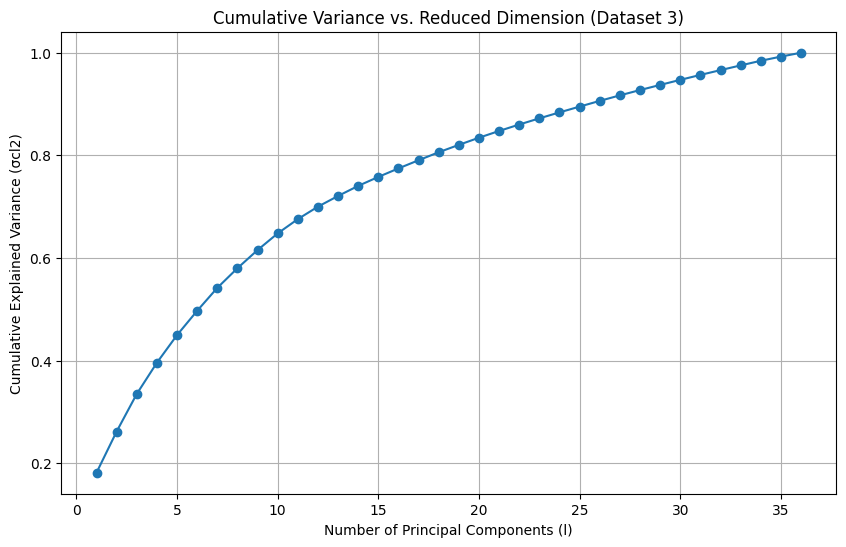

Suitable reduced dimension (l) for Dataset 3: 26


In [ ]:
# prompt: Perform PCA for Dataset 3 and identify a suitable value of the reduced dimension l.  Plot of Cumulative Variance (σcl2 ) vs l

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X_train_3 is your training data for Dataset 3
pca = PCA()
pca.fit(X_train_3)

# Calculate cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative variance vs. number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components (l)')
plt.ylabel('Cumulative Explained Variance (σcl2)')
plt.title('Cumulative Variance vs. Reduced Dimension (Dataset 3)')
plt.grid(True)
plt.show()

# Identify a suitable value of l (e.g., where cumulative variance reaches 95%)
l = np.argmax(cumulative_variance >= 0.90) + 1  # Adjust the threshold (0.95) as needed
print(f"Suitable reduced dimension (l) for Dataset 3: {l}")

26
[[-0.37742772 -0.05839238 -0.00589812  0.01941562  0.11154262  0.27357509
   0.00648981  0.05370692  0.10669396  0.00549778  0.03616618  0.03042175
  -0.03890582 -0.00817025  0.06210457  0.08330551  0.12038195 -0.00867333
   0.07469497 -0.06355199  0.03438508 -0.02538233  0.03429159  0.02327736
  -0.01280586 -0.03823026]]


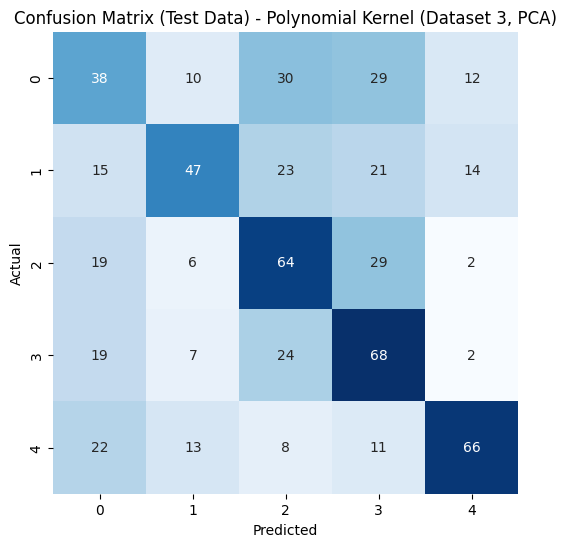

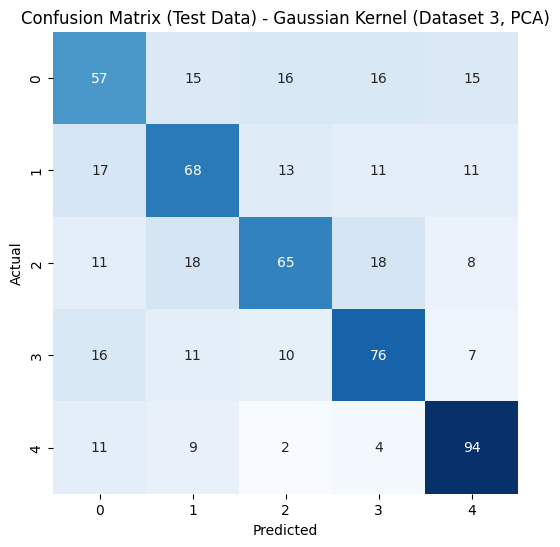


Support Vector Statistics (PCA):


,Kernel,Bounded Support Vectors (%),Unbounded Support Vectors (%)
0,Polynomial,27.822773,59.933302
1,Gaussian,54.883278,37.636970


In [ ]:
# prompt: Confusion matrix with reduced dimension representation obtained in previous (31), as the input to the SVM calssifier of the best performing model for dataset 3 (polynomial and gaussian both). Also A table of percentage of bounded and unbounded support vectors out of the training examples.

# Assuming best_poly_model_3 and best_gaussian_model_3 are already defined

# Apply PCA to reduce dimensions
pca = PCA(n_components=l) # Use the 'l' you determined earlier
X_train_pca = pca.fit_transform(X_train_3)
print(X_train_pca.shape[1])
print(X_train_pca[:1])
X_test_pca = pca.transform(X_test_3)

# Train SVM models on PCA-reduced data
best_poly_model_pca = svm.SVC(kernel='poly', degree=best_poly_model_3.degree, C=best_poly_model_3.C) # Use parameters from best_poly_model_3
best_poly_model_pca.fit(X_train_pca, y_train_3)

best_gaussian_model_pca = svm.SVC(kernel='rbf', gamma=best_gaussian_model_3.gamma, C=best_gaussian_model_3.C) # Use parameters from best_gaussian_model_3
best_gaussian_model_pca.fit(X_train_pca, y_train_3)

# Predictions for PCA reduced data
y_pred_test_poly_pca = best_poly_model_pca.predict(X_test_pca)
y_pred_test_gaussian_pca = best_gaussian_model_pca.predict(X_test_pca)


# Confusion matrices for PCA reduced data
cm_test_poly_pca = confusion_matrix(y_test_3, y_pred_test_poly_pca)
cm_test_gaussian_pca = confusion_matrix(y_test_3, y_pred_test_gaussian_pca)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_test_poly_pca, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Data) - Polynomial Kernel (Dataset 3, PCA)")
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(cm_test_gaussian_pca, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Data) - Gaussian Kernel (Dataset 3, PCA)")
plt.show()

# Calculate support vector statistics for the PCA models
bounded_percent_poly_pca, unbounded_percent_poly_pca = support_vector_stats(best_poly_model_pca, X_train_pca, y_train_3)
bounded_percent_gaussian_pca, unbounded_percent_gaussian_pca = support_vector_stats(best_gaussian_model_pca, X_train_pca, y_train_3)

# Create a table for the PCA results
data_pca = {
    'Kernel': ['Polynomial', 'Gaussian'],
    'Bounded Support Vectors (%)': [bounded_percent_poly_pca, bounded_percent_gaussian_pca],
    'Unbounded Support Vectors (%)': [unbounded_percent_poly_pca, unbounded_percent_gaussian_pca]
}
df_pca = pd.DataFrame(data_pca)
print("\nSupport Vector Statistics (PCA):")
df_pca